In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
microbes = pd.read_csv('./data/rel_microbes.from_biom.tsv', sep='\t', index_col=0)
metabolites = pd.read_csv('./data/rel_metabolites.from_biom.tsv', sep='\t', index_col=0)

In [4]:
microbes.head()

,sample_341,sample_1499,sample_335,sample_2132,sample_2474,sample_1086,sample_1915,sample_159,sample_653,sample_1437,...,sample_313,sample_1964,sample_1609,sample_1637,sample_1960,sample_187,sample_2021,sample_1440,sample_2100,sample_2020
#OTU ID,,,,,,,,,,,,,,,,,,,,,
theta_p_0,60.0,481.0,182.0,571.0,87.0,134.0,178.0,275.0,53.0,59.0,...,56.0,138.0,551.0,167.0,390.0,222.0,369.0,101.0,67.0,142.0
theta_p_1,197.0,104.0,27.0,45.0,42.0,62.0,104.0,26.0,62.0,137.0,...,25.0,177.0,118.0,398.0,43.0,103.0,30.0,176.0,31.0,160.0
theta_p_2,15.0,39.0,135.0,59.0,219.0,57.0,8.0,53.0,48.0,375.0,...,5.0,306.0,104.0,377.0,32.0,266.0,39.0,20.0,89.0,28.0
theta_p_3,9.0,88.0,122.0,114.0,19.0,32.0,68.0,17.0,37.0,34.0,...,34.0,13.0,59.0,57.0,35.0,13.0,19.0,35.0,28.0,58.0
theta_p_4,79.0,326.0,44.0,322.0,22.0,414.0,27.0,36.0,20.0,18.0,...,58.0,135.0,75.0,421.0,10.0,35.0,268.0,212.0,18.0,86.0


In [5]:
metabolites.head()

,sample_126,sample_127,sample_128,sample_129,sample_130,sample_131,sample_132,sample_133,sample_134,sample_135,...,sample_2510,sample_2511,sample_2512,sample_2513,sample_2514,sample_2515,sample_2516,sample_2517,sample_2518,sample_2519
#OTU ID,,,,,,,,,,,,,,,,,,,,,
P_0,9.984261e+06,1.673015e+07,1.553211e+07,9.526305e+06,2.075625e+07,1.377428e+07,1.026732e+07,1.126683e+07,1.189009e+07,7.784335e+06,...,3.360860e+07,1.336116e+07,1.084934e+07,1.476828e+07,9.587357e+06,1.774556e+07,5.196061e+06,1.598415e+07,8.268541e+06,2.157853e+07
P_1,5.627557e+06,3.584205e+06,3.315890e+06,4.590533e+06,3.448489e+06,4.161782e+06,4.977201e+06,3.276491e+06,5.170719e+06,1.448178e+06,...,2.291204e+06,2.847198e+06,2.791451e+06,2.433706e+06,4.660650e+06,3.743524e+06,2.482116e+06,3.554089e+06,2.701369e+06,2.942046e+06
P_2,4.516346e+06,8.961674e+06,7.086252e+06,5.586603e+06,9.011874e+06,9.370849e+06,6.487410e+06,6.856086e+06,7.917220e+06,4.924549e+06,...,1.199863e+07,1.113481e+07,7.227623e+06,9.116475e+06,5.972348e+06,8.834061e+06,4.371040e+06,9.106983e+06,5.390304e+06,9.374330e+06
P_3,3.146196e+06,3.200767e+06,2.991411e+06,3.524390e+06,3.665124e+06,2.961840e+06,3.487971e+06,3.105467e+06,5.031372e+06,1.817242e+06,...,2.964300e+06,2.111506e+06,2.636465e+06,2.284357e+06,2.932795e+06,3.103802e+06,2.291112e+06,4.326523e+06,2.724141e+06,3.132087e+06
P_4,2.099035e+06,2.484916e+06,1.603054e+06,1.772061e+06,2.052590e+06,2.418923e+06,2.545530e+06,1.880178e+06,2.926636e+06,8.917568e+05,...,1.268405e+06,1.702627e+06,1.475635e+06,1.756423e+06,2.479370e+06,2.445041e+06,1.372812e+06,2.093592e+06,1.699032e+06,1.629243e+06


#OTU ID
theta_p_0     0
theta_p_1     0
theta_p_2     0
theta_p_3     0
theta_p_4     0
theta_p_5     1
theta_p_6     3
theta_p_7     1
theta_p_8     5
theta_p_9    45
dtype: int64


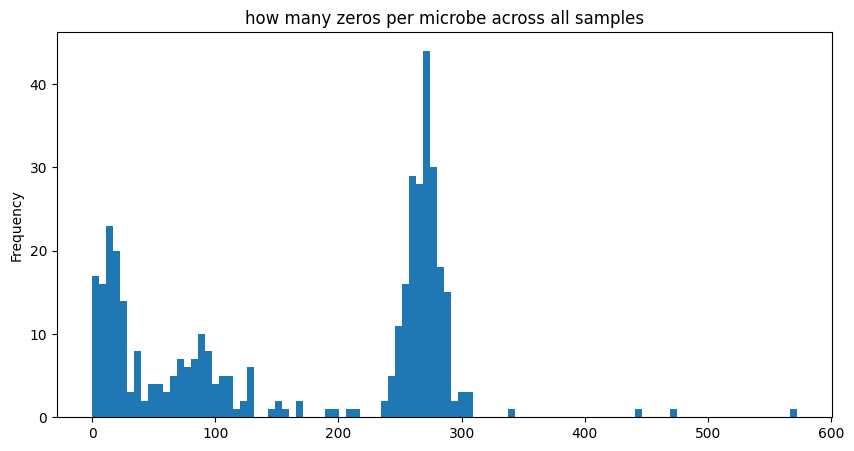

In [16]:
# count how many zeros per microbe
zero_count = (microbes == 0).sum(axis=1)
print(zero_count.head(10))
fig = zero_count.plot(kind='hist', bins=100, figsize=(10, 5))
fig.title.set_text('how many zeros per microbe across all samples')

sample_341      62
sample_1499     29
sample_335      64
sample_2132    111
sample_2474     33
sample_1086     42
sample_1915     47
sample_159      50
sample_653      39
sample_1437     37
dtype: int64


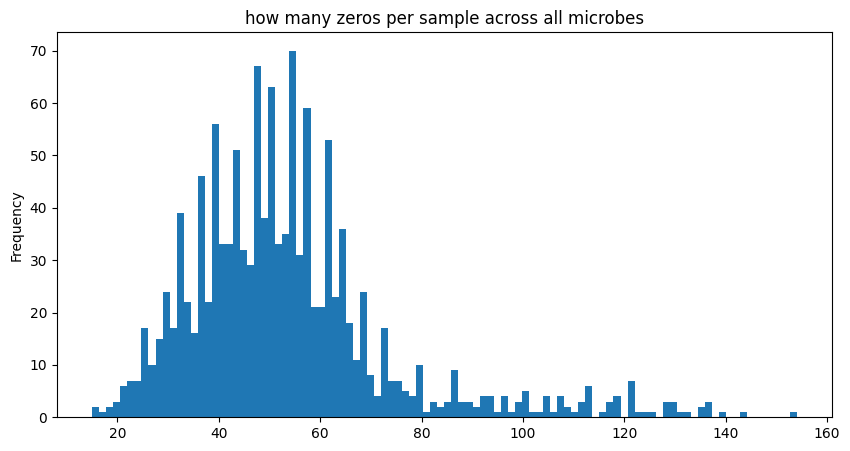

In [17]:
# count how many zeros per sample
zero_count = (microbes == 0).sum(axis=0)
print(zero_count.head(10))
fig = zero_count.plot(kind='hist', bins=100, figsize=(10, 5))
fig.title.set_text('how many zeros per sample across all microbes')

In [38]:
coefficients = pd.read_csv('./results/rel_normalized/coefficient_matrix_parallel.tsv', sep='\t', index_col=0)
abs_coefficients = pd.read_csv('./results/abs/coefficient_matrix_parallel.tsv', sep='\t', index_col=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f446ddd6d50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f446db39a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f446ddf5510>],
 'medians': [<matplotlib.lines.Line2D at 0x7f446db3ab10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f446db3b350>],
 'means': []}

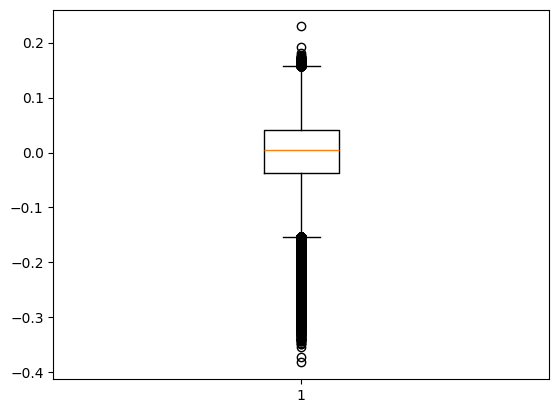

In [5]:
plt.boxplot(coefficients.values.ravel())

{'whiskers': [<matplotlib.lines.Line2D at 0x7f445bd27d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f445bdef710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f445bd26a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f445bbec8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f445bb661d0>],
 'means': []}

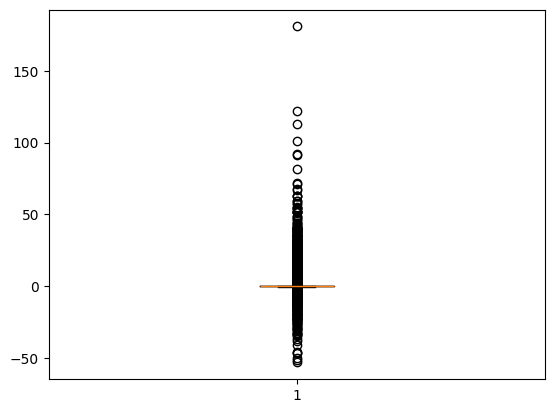

In [39]:
plt.boxplot(abs_coefficients.values.ravel())

(array([3.0000e+00, 5.0000e+01, 1.7900e+02, 5.5400e+02, 2.8600e+03,
        7.9010e+03, 1.2883e+04, 1.5180e+04, 1.1717e+04, 7.2940e+03,
        8.6700e+03, 2.7680e+04, 6.1885e+04, 6.6880e+04, 2.8654e+04,
        1.3258e+04, 1.1808e+04, 2.5040e+03, 3.9000e+01, 1.0000e+00]),
 array([-0.3823434 , -0.3517516 , -0.3211598 , -0.29056801, -0.25997621,
        -0.22938442, -0.19879262, -0.16820083, -0.13760903, -0.10701724,
        -0.07642544, -0.04583365, -0.01524185,  0.01534995,  0.04594174,
         0.07653354,  0.10712533,  0.13771713,  0.16830892,  0.19890072,
         0.22949251]),
 <BarContainer object of 20 artists>)

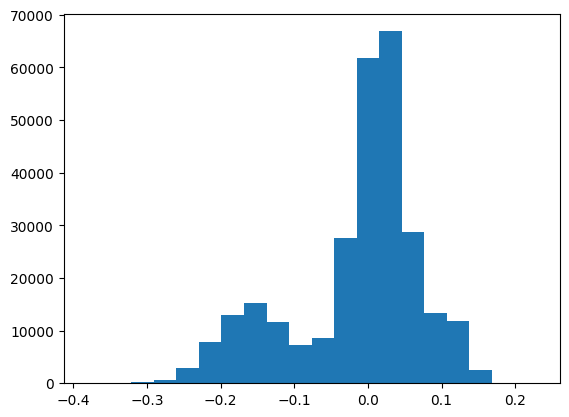

In [6]:
plt.hist(coefficients.values.ravel(), bins=20)

(array([6.7611e+04, 6.7421e+04, 5.4552e+04, 4.2319e+04, 8.1134e+04,
        4.6027e+04, 4.9605e+04, 2.9845e+04, 2.5348e+04, 1.6497e+04,
        1.0576e+04, 6.3730e+03, 3.4600e+03, 1.7790e+03, 8.6900e+02,
        3.6900e+02, 1.4600e+02, 5.3000e+01, 1.2000e+01, 4.0000e+00]),
 array([0.        , 0.39701139, 0.79402278, 1.19103416, 1.58804555,
        1.98505694, 2.38206833, 2.77907972, 3.17609111, 3.57310249,
        3.97011388, 4.36712527, 4.76413666, 5.16114805, 5.55815944,
        5.95517082, 6.35218221, 6.7491936 , 7.14620499, 7.54321638,
        7.94022777]),
 <BarContainer object of 20 artists>)

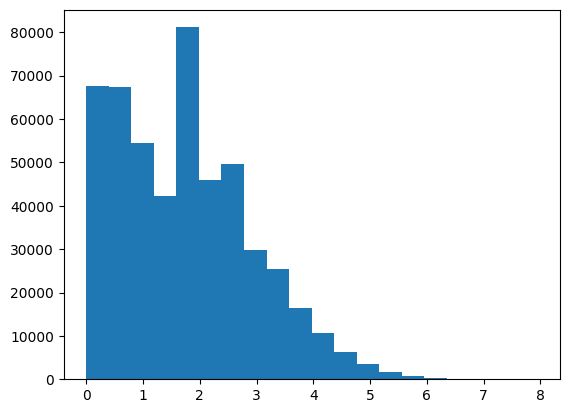

In [23]:
# plt.hist(microbes.values.ravel(), bins=20)
plt.hist(np.log(microbes.values + 1).ravel(), bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f446394fa90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4463960cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f446394f1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4463961d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4463962590>],
 'means': []}

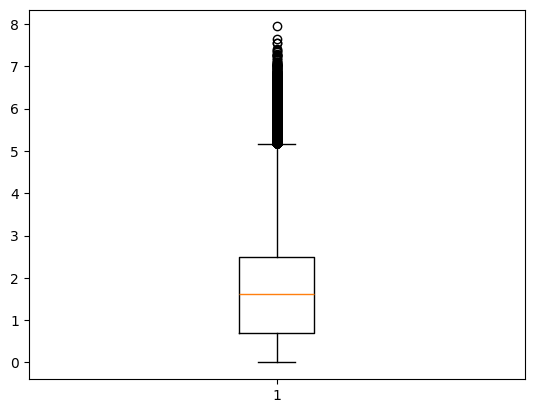

In [24]:
plt.boxplot(np.log(microbes.values + 1).ravel())

(array([289.,  51.,  39.,   7.,   3.,   3.,   1.,   4.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1862. ,  16230.6,  30599.2,  44967.8,  59336.4,  73705. ,
         88073.6, 102442.2, 116810.8, 131179.4, 145548. , 159916.6,
        174285.2, 188653.8, 203022.4, 217391. , 231759.6, 246128.2,
        260496.8, 274865.4, 289234. ]),
 <BarContainer object of 20 artists>)

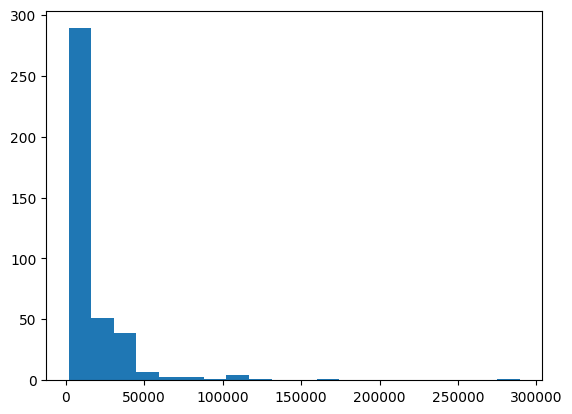

In [18]:
plt.hist(microbes.values.sum(axis=1), bins=20)
# sum of all values of a microbe are heavily skewed

(array([  3.,   2., 206.,   4.,  14.,  29.,  30.,  18.,  22.,  34.,  15.,
          8.,   2.,   5.,   1.,   4.,   1.,   1.,   0.,   1.]),
 array([ 790.9454848 , 1067.44138235, 1343.93727991, 1620.43317746,
        1896.92907502, 2173.42497257, 2449.92087013, 2726.41676768,
        3002.91266524, 3279.40856279, 3555.90446035, 3832.4003579 ,
        4108.89625546, 4385.39215301, 4661.88805057, 4938.38394812,
        5214.87984568, 5491.37574323, 5767.87164079, 6044.36753834,
        6320.8634359 ]),
 <BarContainer object of 20 artists>)

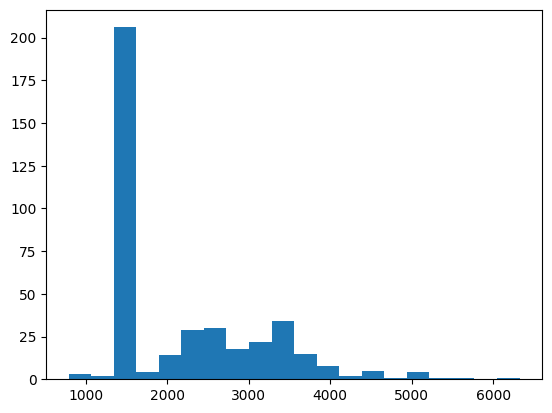

In [19]:
plt.hist(np.log(microbes.values + 1).sum(axis=1), bins=20)
# sum of all values of a microbe after log transformation are still skewed

(array([  5.,  12.,  38.,  45., 106., 140., 150., 173., 166., 147.,  97.,
         77.,  43.,  25.,  19.,  10.,   3.,   2.,   0.,   2.]),
 array([3633.  , 3810.85, 3988.7 , 4166.55, 4344.4 , 4522.25, 4700.1 ,
        4877.95, 5055.8 , 5233.65, 5411.5 , 5589.35, 5767.2 , 5945.05,
        6122.9 , 6300.75, 6478.6 , 6656.45, 6834.3 , 7012.15, 7190.  ]),
 <BarContainer object of 20 artists>)

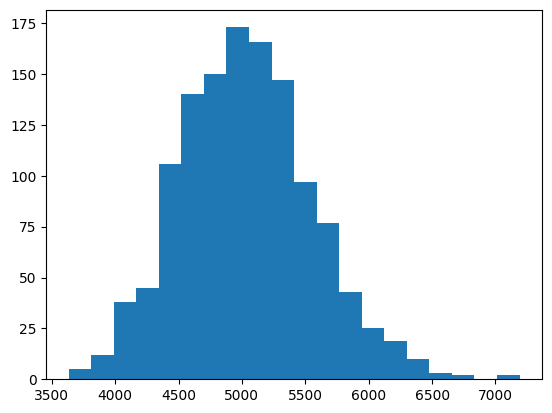

In [15]:
plt.hist(microbes.values.sum(axis=0), bins=20)
# sum of all values of an experiment are normally distributed

In [26]:
abs_microbes = pd.read_csv('./data/abs_microbes.from_biom.tsv', sep='\t', index_col=0)
abs_metabolites = pd.read_csv('./data/rel_metabolites.from_biom.tsv', sep='\t', index_col=0)

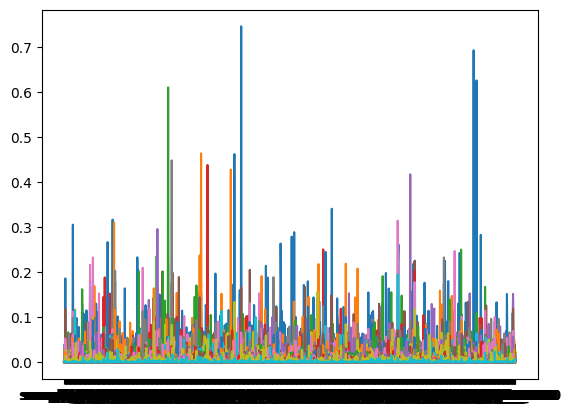

In [36]:
plt.plot(abs_microbes.head(100).T)

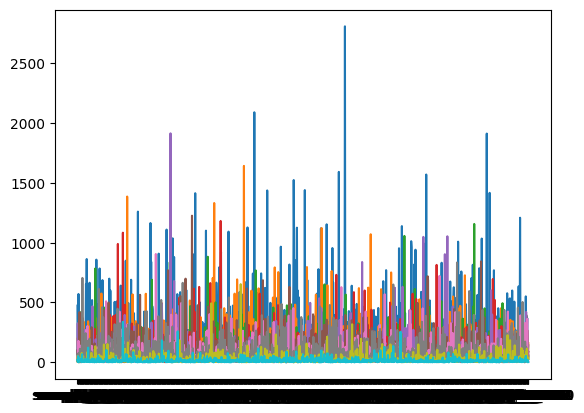

In [37]:
plt.plot(microbes.head(10).T)

In [ ]:
plt.plot()

## New visualizations

In [6]:
rel_microbes = pd.read_csv('./data/rel_microbes.from_biom.tsv', sep='\t', index_col=0)
rel_metabolites = pd.read_csv('./data/rel_metabolites.from_biom.tsv', sep='\t', index_col=0)

(array([231903.,  99085.,  48874.,  28807.,  19296.,  13606.,  10026.,
          7567.,   6101.,   4918.,   4058.,   3301.,   2817.,   2346.,
          2000.,   1727.,   1494.,   1286.,   1181.,   1070.,    911.,
           821.,    746.,    662.,    581.]),
 array([ 0.  ,  3.96,  7.92, 11.88, 15.84, 19.8 , 23.76, 27.72, 31.68,
        35.64, 39.6 , 43.56, 47.52, 51.48, 55.44, 59.4 , 63.36, 67.32,
        71.28, 75.24, 79.2 , 83.16, 87.12, 91.08, 95.04, 99.  ]),
 <BarContainer object of 25 artists>)

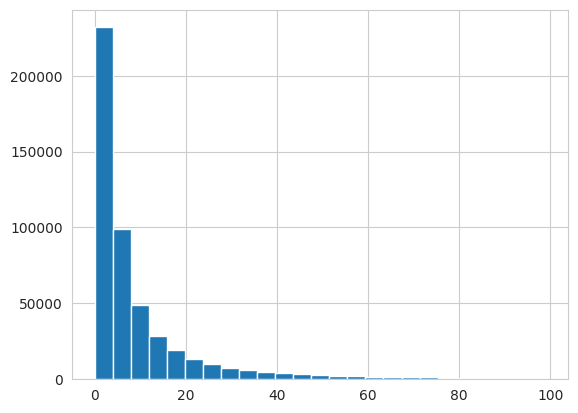

In [7]:
plt.hist(rel_microbes.values.ravel()[rel_microbes.values.ravel() < 100], bins=25)

(array([6.93878e+05, 1.16026e+05, 3.17780e+04, 1.35330e+04, 7.94600e+03,
        5.12900e+03, 3.67700e+03, 2.42800e+03, 1.62400e+03, 1.13100e+03,
        7.23000e+02, 5.41000e+02, 3.81000e+02, 3.44000e+02, 2.55000e+02,
        2.00000e+02, 1.63000e+02, 1.57000e+02, 1.41000e+02, 1.24000e+02,
        9.70000e+01, 9.10000e+01, 1.05000e+02, 8.20000e+01, 1.00000e+02]),
 array([       0.        ,  1996304.3776976 ,  3992608.75539519,
         5988913.13309279,  7985217.51079039,  9981521.88848798,
        11977826.26618558, 13974130.64388318, 15970435.02158077,
        17966739.39927837, 19963043.77697597, 21959348.15467357,
        23955652.53237116, 25951956.91006876, 27948261.28776636,
        29944565.66546395, 31940870.04316155, 33937174.42085914,
        35933478.79855675, 37929783.17625434, 39926087.55395193,
        41922391.93164954, 43918696.30934713, 45915000.68704472,
        47911305.06474233, 49907609.44243992]),
 <BarContainer object of 25 artists>)

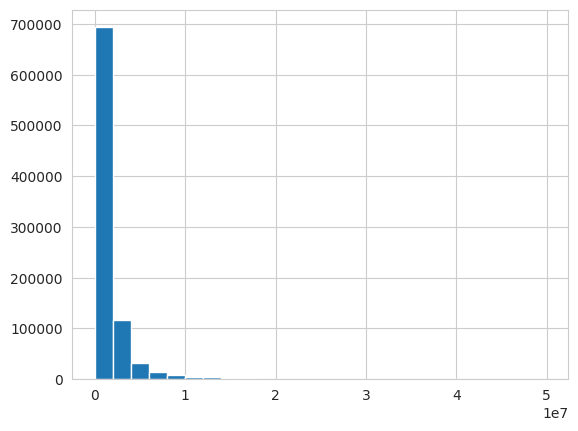

In [8]:
plt.hist(rel_metabolites.values.ravel()[rel_metabolites.values.ravel() < 50000000], bins=25)

Both dataframes are heavily skewed.

Now let's look at the relative normalized coefficients and the absolute normalized coefficients (! plots with log scale y axis!)

(array([2.0000e+00, 2.0000e+01, 9.5000e+01, 1.4800e+02, 5.2100e+02,
        2.0960e+03, 4.1810e+03, 9.3970e+03, 1.1348e+04, 1.1802e+04,
        9.8390e+03, 6.3820e+03, 5.3150e+03, 8.0790e+03, 2.5746e+04,
        5.3367e+04, 4.3881e+04, 4.8425e+04, 1.4450e+04, 1.0554e+04,
        9.7770e+03, 4.1820e+03, 3.9000e+02, 2.0000e+00, 1.0000e+00]),
 array([-0.3823434 , -0.35786996, -0.33339652, -0.30892309, -0.28444965,
        -0.25997621, -0.23550278, -0.21102934, -0.1865559 , -0.16208247,
        -0.13760903, -0.1131356 , -0.08866216, -0.06418872, -0.03971529,
        -0.01524185,  0.00923159,  0.03370502,  0.05817846,  0.0826519 ,
         0.10712533,  0.13159877,  0.1560722 ,  0.18054564,  0.20501908,
         0.22949251]),
 <BarContainer object of 25 artists>)

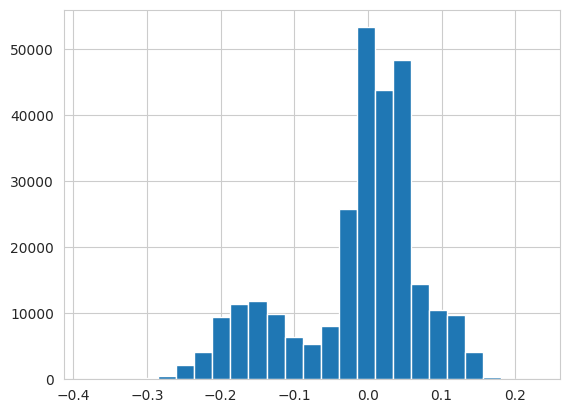

In [9]:
rel_norm_coefficients = pd.read_csv("./results/rel_normalized/coefficient_matrix_parallel.tsv", sep='\t', index_col=0)
plt.hist(rel_norm_coefficients.values.ravel(), bins=25, log=False)

(array([4.00000e+00, 9.00000e+00, 2.20000e+01, 7.20000e+01, 1.92300e+03,
        2.74908e+05, 2.47900e+03, 3.40000e+02, 1.22000e+02, 6.50000e+01,
        2.60000e+01, 1.40000e+01, 7.00000e+00, 0.00000e+00, 2.00000e+00,
        3.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-3.24804439, -2.63321559, -2.01838678, -1.40355798, -0.78872918,
        -0.17390037,  0.44092843,  1.05575724,  1.67058604,  2.28541484,
         2.90024365,  3.51507245,  4.12990126,  4.74473006,  5.35955886,
         5.97438767,  6.58921647,  7.20404528,  7.81887408,  8.43370288,
         9.04853169,  9.66336049, 10.2781893 , 10.8930181 , 11.50784691,
        12.12267571]),
 <BarContainer object of 25 artists>)

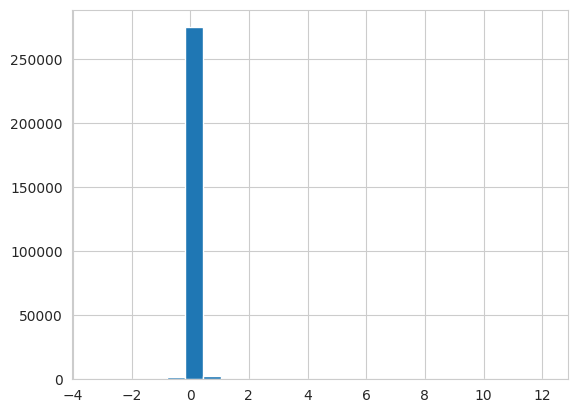

In [10]:
abs_norm_coefficients = pd.read_csv("./results/abs_normalized/coefficient_matrix_parallel.tsv", sep='\t', index_col=0)
plt.hist(abs_norm_coefficients.values.ravel(), bins=25, log=False)

Now let's select only the 'released' relationship coefficients (theta_p, P), (theta_p, I), (theta_f, F)

In [11]:
rel_norm_coefficients

,noise_otu_0,noise_otu_1,noise_otu_10,noise_otu_100,noise_otu_101,noise_otu_102,noise_otu_103,noise_otu_104,noise_otu_105,noise_otu_106,...,theta_p_90,theta_p_91,theta_p_92,theta_p_93,theta_p_94,theta_p_95,theta_p_96,theta_p_97,theta_p_98,theta_p_99
F_0,-0.142796,-0.224044,-0.197262,-0.247490,-0.201040,-0.169448,-0.159085,-0.093406,-0.167928,-0.184631,...,0.005644,-0.034250,0.003870,0.046830,0.024432,0.019477,-0.024077,0.054496,0.043319,0.005206
F_1,-0.147378,-0.226402,-0.208684,-0.257970,-0.212666,-0.181764,-0.178081,-0.095591,-0.171593,-0.199861,...,0.003216,-0.032447,0.007303,0.050644,0.023154,0.023569,-0.024349,0.062547,0.042890,0.001850
F_10,-0.150106,-0.236284,-0.211227,-0.264837,-0.218817,-0.183970,-0.182045,-0.101279,-0.174574,-0.197969,...,0.004498,-0.035139,0.008170,0.056252,0.021955,0.021701,-0.026547,0.058658,0.044157,0.006292
F_11,-0.141440,-0.216051,-0.191606,-0.242062,-0.193630,-0.169846,-0.159318,-0.090869,-0.162217,-0.189586,...,0.005512,-0.030877,0.006466,0.048030,0.025600,0.020650,-0.020772,0.055232,0.041687,0.001381
F_12,-0.139839,-0.215372,-0.192679,-0.239837,-0.192398,-0.168671,-0.159189,-0.094137,-0.159541,-0.185204,...,0.005629,-0.035563,0.008108,0.047711,0.023197,0.021522,-0.019349,0.054025,0.036529,0.005078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
noise_ms_95,0.041013,0.048787,0.042619,0.020474,0.050996,0.040042,0.031943,0.027435,0.040433,0.039782,...,0.020376,-0.002693,-0.005755,-0.003581,-0.007394,0.000445,-0.017019,-0.007389,-0.006885,-0.007882
noise_ms_96,0.046442,0.036561,0.024348,0.035142,0.046034,0.043177,0.039096,0.046343,0.030429,0.028989,...,-0.003501,0.005964,0.011509,-0.015720,-0.006638,0.002010,-0.007181,-0.013290,-0.012655,-0.015571
noise_ms_97,0.018309,0.033975,0.023590,0.031279,0.028038,0.014713,0.040721,0.021118,0.026357,0.016667,...,-0.006672,-0.006445,0.004413,-0.027484,0.006573,-0.017821,0.004764,-0.006640,-0.019788,-0.010825
noise_ms_98,0.030751,0.062435,0.047234,0.049089,0.039807,0.049458,0.029272,0.041981,0.037551,0.033133,...,0.000749,0.001239,-0.000731,-0.012443,-0.002723,-0.021023,0.006687,-0.010162,-0.008305,-0.005264


Text(0.5, 1.0, 'Correlation Matrix')

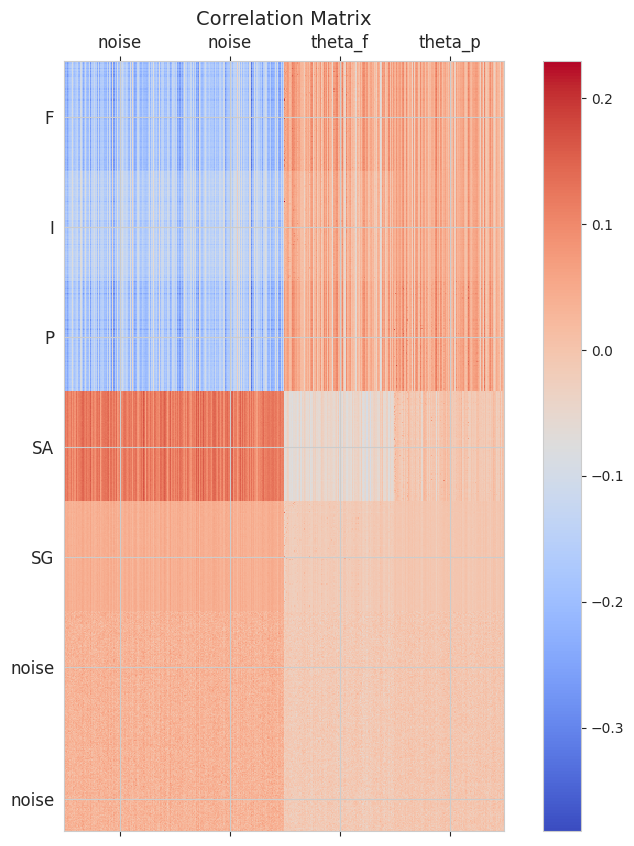

In [12]:
# Create figure
figure = plt.figure(figsize=(10, 10))
axes = figure.add_subplot()

# Display the correlation matrix
caxes = axes.matshow(rel_norm_coefficients, cmap='coolwarm')

# Add colorbar
figure.colorbar(caxes, orientation='vertical')

# Define labels for every 100 columns
xlabels = ['noise', 'noise', 'theta_f', 'theta_p']
ylabels = ['F', 'I', 'P', 'SA', 'SG', 'noise', 'noise']
ticks = [50, 150, 250, 350, 450, 550, 670]  # Approximate center of each partition

# Apply labels to x and y axes
axes.set_xticks(ticks[:4])
axes.set_yticks(ticks)
axes.set_xticklabels(xlabels, fontsize=12)
axes.set_yticklabels(ylabels, fontsize=12)

# Add title
plt.title("Correlation Matrix", fontsize=14)

In [13]:
rel_norm_coefficients

,noise_otu_0,noise_otu_1,noise_otu_10,noise_otu_100,noise_otu_101,noise_otu_102,noise_otu_103,noise_otu_104,noise_otu_105,noise_otu_106,...,theta_p_90,theta_p_91,theta_p_92,theta_p_93,theta_p_94,theta_p_95,theta_p_96,theta_p_97,theta_p_98,theta_p_99
F_0,-0.142796,-0.224044,-0.197262,-0.247490,-0.201040,-0.169448,-0.159085,-0.093406,-0.167928,-0.184631,...,0.005644,-0.034250,0.003870,0.046830,0.024432,0.019477,-0.024077,0.054496,0.043319,0.005206
F_1,-0.147378,-0.226402,-0.208684,-0.257970,-0.212666,-0.181764,-0.178081,-0.095591,-0.171593,-0.199861,...,0.003216,-0.032447,0.007303,0.050644,0.023154,0.023569,-0.024349,0.062547,0.042890,0.001850
F_10,-0.150106,-0.236284,-0.211227,-0.264837,-0.218817,-0.183970,-0.182045,-0.101279,-0.174574,-0.197969,...,0.004498,-0.035139,0.008170,0.056252,0.021955,0.021701,-0.026547,0.058658,0.044157,0.006292
F_11,-0.141440,-0.216051,-0.191606,-0.242062,-0.193630,-0.169846,-0.159318,-0.090869,-0.162217,-0.189586,...,0.005512,-0.030877,0.006466,0.048030,0.025600,0.020650,-0.020772,0.055232,0.041687,0.001381
F_12,-0.139839,-0.215372,-0.192679,-0.239837,-0.192398,-0.168671,-0.159189,-0.094137,-0.159541,-0.185204,...,0.005629,-0.035563,0.008108,0.047711,0.023197,0.021522,-0.019349,0.054025,0.036529,0.005078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
noise_ms_95,0.041013,0.048787,0.042619,0.020474,0.050996,0.040042,0.031943,0.027435,0.040433,0.039782,...,0.020376,-0.002693,-0.005755,-0.003581,-0.007394,0.000445,-0.017019,-0.007389,-0.006885,-0.007882
noise_ms_96,0.046442,0.036561,0.024348,0.035142,0.046034,0.043177,0.039096,0.046343,0.030429,0.028989,...,-0.003501,0.005964,0.011509,-0.015720,-0.006638,0.002010,-0.007181,-0.013290,-0.012655,-0.015571
noise_ms_97,0.018309,0.033975,0.023590,0.031279,0.028038,0.014713,0.040721,0.021118,0.026357,0.016667,...,-0.006672,-0.006445,0.004413,-0.027484,0.006573,-0.017821,0.004764,-0.006640,-0.019788,-0.010825
noise_ms_98,0.030751,0.062435,0.047234,0.049089,0.039807,0.049458,0.029272,0.041981,0.037551,0.033133,...,0.000749,0.001239,-0.000731,-0.012443,-0.002723,-0.021023,0.006687,-0.010162,-0.008305,-0.005264


Text(95.58159722222221, 0.5, 'Features')

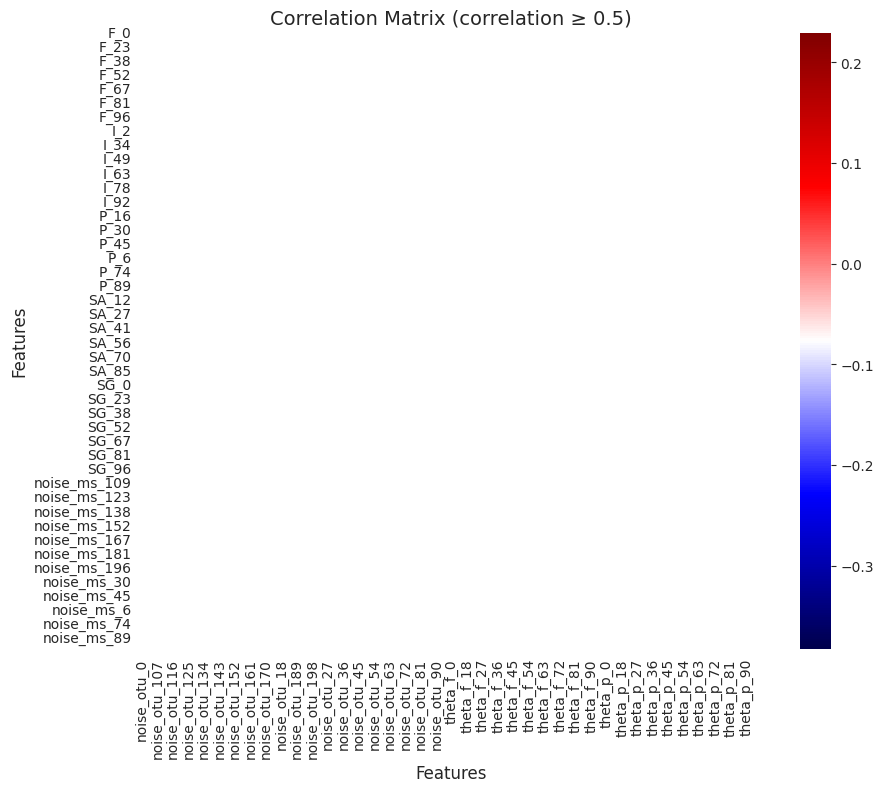

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create figure and axes with increased size
fig, ax = plt.subplots(figsize=(10, 8))
# Plot heatmap with better color mapping and annotations
sns.heatmap(rel_norm_coefficients, cmap='seismic', annot=False, fmt=".2f", linewidths=0.5, ax=ax)

# Improve title and axis labels
ax.set_title("Correlation Matrix (correlation ≥ 0.5)", fontsize=14)
ax.set_xlabel("Features", fontsize=12)
ax.set_ylabel("Features", fontsize=12)

In [15]:
theta_f_cols = ['theta_f_%d' % d for d in range(100)]
theta_p_cols = ['theta_p_%d' % d for d in range(100)]
F_rows = ['F_%d' % d for d in range(100)]
P_rows = ['P_%d' % d for d in range(100)]
I_rows = ['I_%d' % d for d in range(100)]
SA_rows = ['SA_%d' % d for d in range(100)]
SG_rows = ['SG_%d' % d for d in range(100)]

In [16]:
F_theta_f = rel_norm_coefficients.loc[F_rows, theta_f_cols]
P_theta_p = rel_norm_coefficients.loc[P_rows, theta_p_cols]
I_theta_p = rel_norm_coefficients.loc[I_rows, theta_p_cols]
I_theta_f = rel_norm_coefficients.loc[I_rows, theta_f_cols]

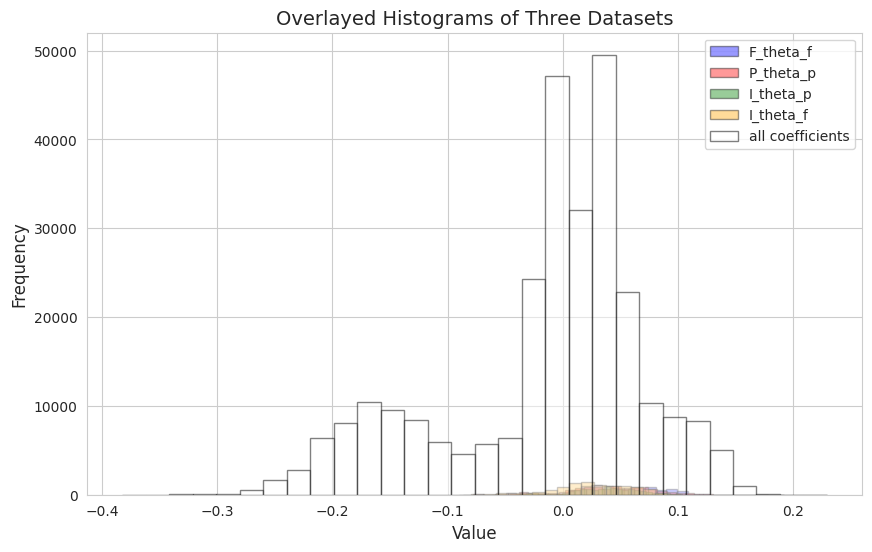

In [17]:
# Create figure and axis
plt.figure(figsize=(10, 6))

# Overlay histograms
plt.hist(F_theta_f.values.ravel(), bins=30, alpha=0.4, color='blue', label='F_theta_f', edgecolor='black')
plt.hist(P_theta_p.values.ravel(), bins=30, alpha=0.4, color='red', label='P_theta_p', edgecolor='black')
plt.hist(I_theta_p.values.ravel(), bins=30, alpha=0.4, color='green', label='I_theta_p', edgecolor='black')
plt.hist(I_theta_f.values.ravel(), bins=30, alpha=0.4, color='orange', label='I_theta_f', edgecolor='black')
plt.hist(rel_norm_coefficients.values.ravel(), bins=30, alpha=0.5, color='white', label='all coefficients', edgecolor='black')

# Add labels and title
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Overlayed Histograms of Three Datasets", fontsize=14)
plt.legend()

In [18]:
def get_microbe_names(coefficient_df):
    names = []
    for i in range(len(coefficient_df.columns)//100):
        names.append(coefficient_df.columns[i*100].rsplit('_', 1)[0])
    return names

def get_metabolite_names(coefficient_df):
    names = []
    for i in range(len(coefficient_df.index)//100):
        names.append(coefficient_df.index[i*100].rsplit('_', 1)[0])
    return names


def plot_coefficient_matrix(coefficient_matrix):
    # Create figure
    figure = plt.figure(figsize=(10, 10))
    axes = figure.add_subplot()

    all_values = coefficient_matrix.values.ravel()
    vmin, vmax = -max(abs(all_values.min()), abs(all_values.max())), max(abs(all_values.min()), abs(all_values.max()))
    
    # Display the correlation matrix
    caxes = axes.matshow(coefficient_matrix, cmap='bwr', vmin=vmin, vmax=vmax)
    
    # Add colorbar
    figure.colorbar(caxes, orientation='vertical')
    
    # Define labels for every 100 columns
    xlabels = get_microbe_names(coefficient_matrix)
    ylabels = get_metabolite_names(coefficient_matrix)
    xticks = [i*100 + 50 for i in range(len(xlabels))]  # Approximate center of each partition
    yticks = [i*100 + 50 for i in range(len(ylabels))]  # Approximate center of each partition

    # Apply labels to x and y axes
    axes.set_xticks(xticks)
    axes.set_yticks(yticks)
    axes.set_xticklabels(xlabels, fontsize=12)
    axes.set_yticklabels(ylabels, fontsize=12)
    
    # Add title
    plt.title("Correlation Matrix", fontsize=14)

# plot_coefficient_matrix(rel_norm_coefficients)

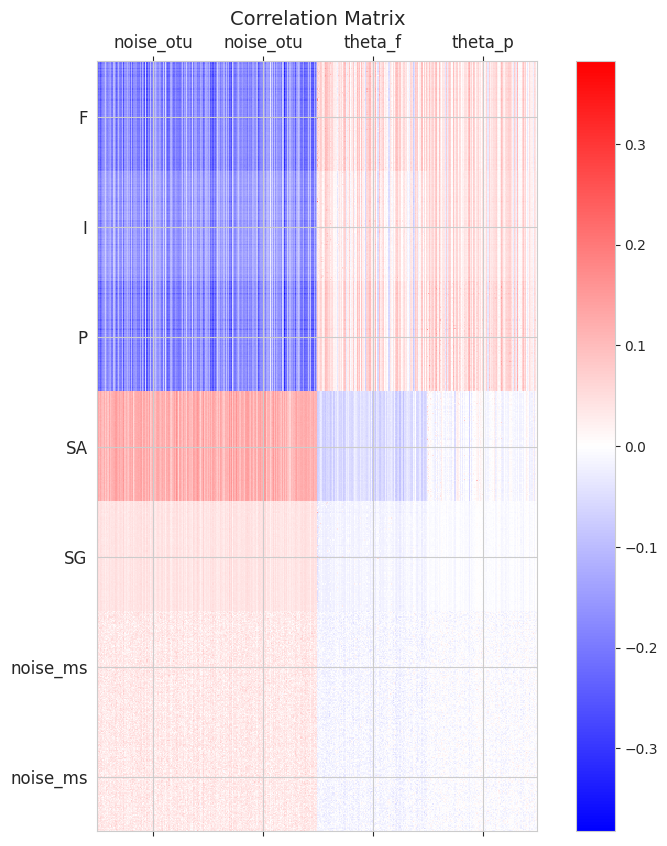

In [19]:
plot_coefficient_matrix(rel_norm_coefficients)

In [23]:
microbes = theta_f_cols + theta_p_cols
metabolites = F_rows + P_rows + I_rows + SA_rows + SG_rows
no_noise = rel_norm_coefficients.loc[metabolites, microbes]
no_noise

,theta_f_0,theta_f_1,theta_f_2,theta_f_3,theta_f_4,theta_f_5,theta_f_6,theta_f_7,theta_f_8,theta_f_9,...,theta_p_90,theta_p_91,theta_p_92,theta_p_93,theta_p_94,theta_p_95,theta_p_96,theta_p_97,theta_p_98,theta_p_99
F_0,0.114040,0.032587,0.037220,0.027279,0.027287,0.068883,0.092851,0.012015,0.052198,0.078649,...,0.005644,-0.034250,0.003870,0.046830,0.024432,0.019477,-0.024077,0.054496,0.043319,0.005206
F_1,0.066111,0.063972,0.095117,0.009192,-0.019400,0.064487,0.089646,0.022120,0.059386,0.076065,...,0.003216,-0.032447,0.007303,0.050644,0.023154,0.023569,-0.024349,0.062547,0.042890,0.001850
F_2,0.063286,0.074083,0.108874,0.015565,-0.016747,0.071858,0.098606,0.013701,0.054674,0.075062,...,0.009100,-0.040310,0.008446,0.052461,0.024451,0.022666,-0.034048,0.062896,0.049263,0.003606
F_3,0.064626,0.070966,0.047908,0.016104,-0.018706,0.067109,0.100801,0.015928,0.054954,0.078847,...,0.004773,-0.032944,0.008800,0.050589,0.025104,0.020409,-0.025221,0.059405,0.043179,0.007138
F_4,0.140050,0.031250,0.042331,0.021955,0.020331,0.062830,0.094987,0.013059,0.053294,0.083758,...,0.004121,-0.034915,0.006538,0.049602,0.024829,0.018959,-0.018738,0.053779,0.042953,0.003829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SG_95,-0.028773,-0.031570,-0.032174,0.029276,-0.014996,-0.024597,-0.027623,-0.010093,-0.027611,-0.007716,...,0.001159,0.000213,-0.000341,-0.009693,-0.002707,-0.001673,0.003438,-0.013405,0.000320,-0.001888
SG_96,-0.024589,-0.030610,-0.026810,-0.002892,-0.012895,-0.015657,-0.017136,-0.010932,-0.025882,-0.005276,...,0.003010,-0.001882,0.003008,-0.008987,-0.003877,-0.006047,0.003641,-0.010155,0.001818,-0.001029
SG_97,-0.041496,-0.018055,-0.009235,-0.019153,-0.007597,0.001668,-0.017570,-0.012048,-0.016489,-0.002097,...,0.006526,0.004486,0.003032,-0.010998,-0.007963,-0.003823,0.001380,-0.009648,0.000082,0.003196
SG_98,-0.010437,-0.032213,-0.022400,-0.019953,0.000546,-0.012058,0.000513,-0.006569,-0.018205,-0.007995,...,0.004006,0.002234,0.003989,-0.012268,-0.004589,-0.005811,0.002414,-0.010996,0.004840,0.001418


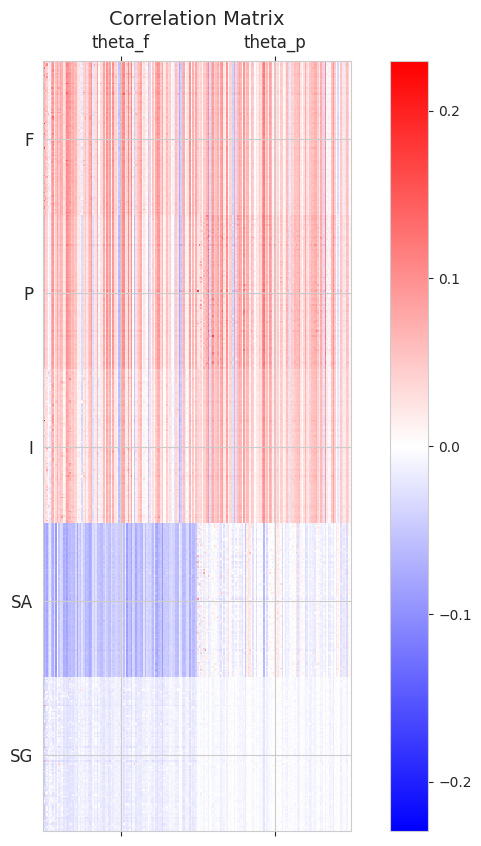

In [30]:
plot_coefficient_matrix(no_noise)

In [31]:
plot_coefficient_matrix(abs_norm_coefficients)

NameError: name 'abs_norm_coefficients' is not defined

In [32]:
def clip_df(df):
    # Compute 5% and 95% quantiles for each column
    lower_bound = df.quantile(0.1)
    upper_bound = df.quantile(0.9)

    # Apply clipping to limit values within the quantile range
    df_clipped = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

    return df_clipped

abs_norm_clipped = clip_df(abs_norm_coefficients)

NameError: name 'abs_norm_coefficients' is not defined

In [33]:
plt.hist(abs_norm_clipped.values.ravel(), bins=25)

NameError: name 'abs_norm_clipped' is not defined

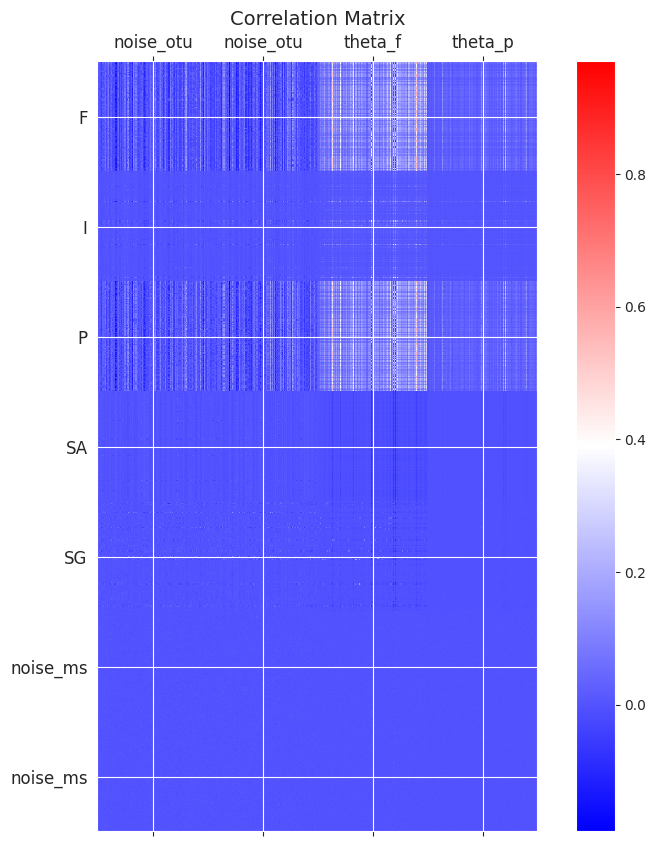

In [125]:
plot_coefficient_matrix(abs_norm_clipped)

In [34]:
mmvec_rel = pd.read_csv("./results/rel_ranks_mmvec.tsv", sep='\t', index_col=0).T
mmvec_rel

,theta_p_0,theta_p_1,theta_p_2,theta_p_3,theta_p_4,theta_p_5,theta_p_6,theta_p_7,theta_p_8,theta_p_9,...,noise_otu_190,noise_otu_191,noise_otu_192,noise_otu_193,noise_otu_194,noise_otu_195,noise_otu_196,noise_otu_197,noise_otu_198,noise_otu_199
P_0,3.371771,3.323527,3.342755,3.372160,3.365328,3.387637,3.600662,3.423906,3.353387,3.448890,...,3.208568,3.140311,3.203105,3.165876,3.143086,3.048123,3.189843,3.070533,3.247445,3.133252
P_1,2.053929,2.045272,2.041547,2.072004,2.083338,2.105282,2.096773,2.105871,2.051551,2.140145,...,1.858379,1.837570,1.821182,1.822065,1.836295,1.768365,1.790693,1.745092,1.857711,1.815165
P_2,2.822849,2.791273,2.803400,2.828714,2.849065,2.871108,2.862612,2.872155,2.817172,2.903943,...,2.620972,2.602082,2.586143,2.586059,2.601836,2.530733,2.553041,2.507731,2.623214,2.579180
P_3,1.873608,1.858179,1.859236,1.887335,1.901027,1.922411,1.914122,1.923131,1.870082,1.955707,...,1.681355,1.661669,1.645870,1.646463,1.660738,1.593750,1.615419,1.571142,1.681578,1.639720
P_4,1.403228,1.401003,1.387738,1.419107,1.424227,1.445041,1.436801,1.445735,1.394859,1.478281,...,1.218711,1.197621,1.182476,1.184515,1.195989,1.135362,1.154864,1.111791,1.216810,1.176747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
noise_ms_195,-2.256675,-2.303368,-2.316637,-2.337993,-2.355270,-2.369316,-2.365578,-2.366355,-2.327497,-2.400411,...,-2.148224,-2.137895,-2.121346,-2.115252,-2.136129,-2.070713,-2.101368,-2.068030,-2.145892,-2.121923
noise_ms_196,-2.199631,-2.179749,-2.187544,-2.204854,-2.218309,-2.233185,-2.227993,-2.233919,-2.196745,-2.255595,...,-2.063888,-2.050984,-2.040323,-2.040136,-2.050776,-2.002585,-2.018119,-1.987300,-2.065357,-2.035563
noise_ms_197,-2.406084,-2.350562,-2.327681,-2.361670,-2.362703,-2.387637,-2.377480,-2.391631,-2.333886,-2.419371,...,-2.169090,-2.141839,-2.129397,-2.136875,-2.141098,-2.085692,-2.095855,-2.047563,-2.169729,-2.118134
noise_ms_198,-2.074140,-2.073383,-1.980062,-2.027663,-1.985700,-2.006745,-1.997065,-2.011136,-1.967292,-2.034928,...,-1.881694,-1.848384,-1.840936,-1.856315,-1.844532,-1.826561,-1.822609,-1.783130,-1.872590,-1.831257


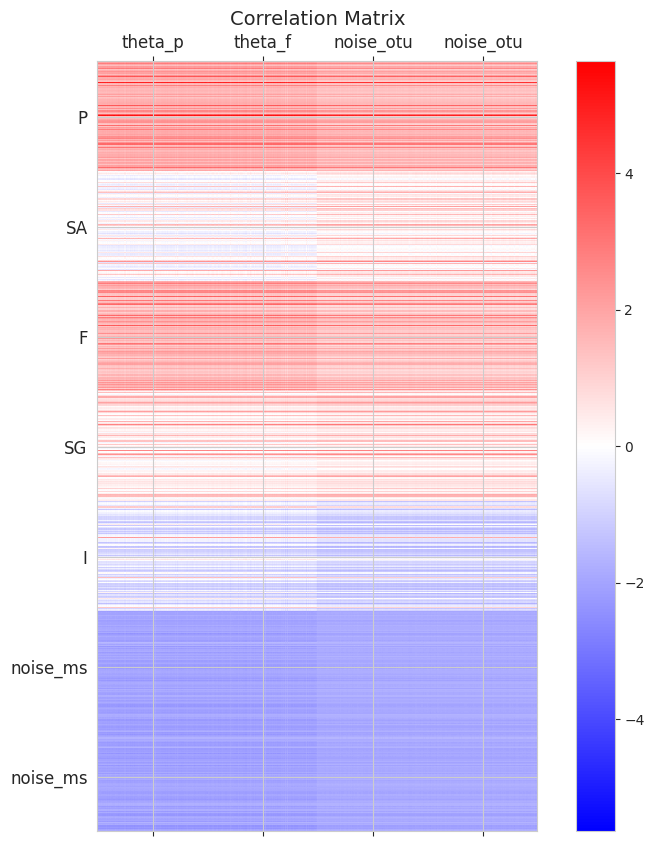

In [35]:
plot_coefficient_matrix(mmvec_rel)

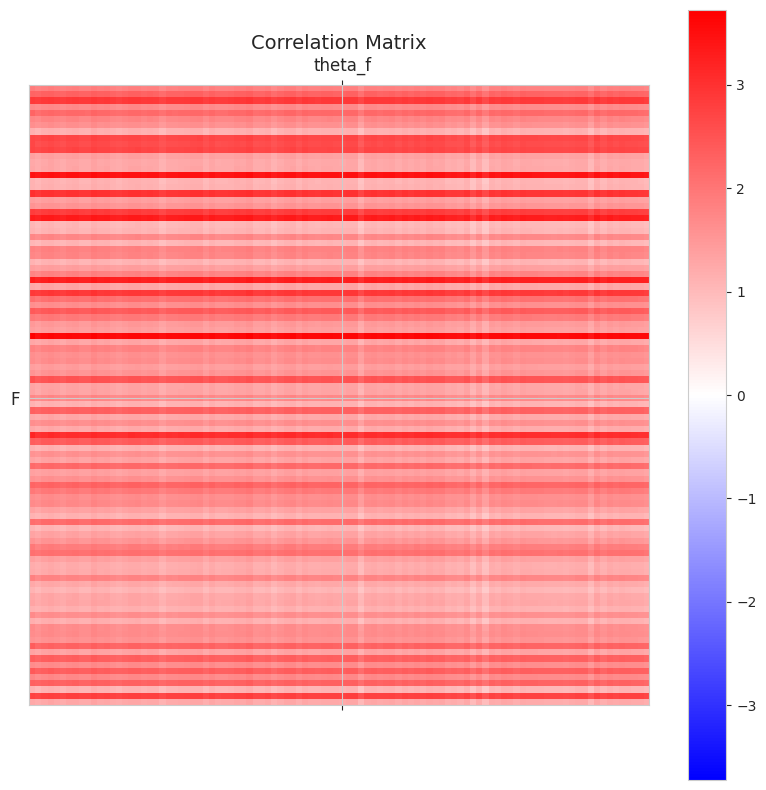

In [36]:
plot_coefficient_matrix(mmvec_rel.loc[F_rows, theta_f_cols])

## Rel data

(array([1.00000e+00, 0.00000e+00, 1.00000e+00, 5.00000e+00, 8.00000e+00,
        8.00000e+00, 1.50000e+01, 1.30000e+01, 2.00000e+01, 4.00000e+01,
        4.80000e+01, 5.30000e+01, 4.80000e+01, 6.50000e+01, 2.11000e+02,
        1.36300e+03, 1.03670e+04, 2.59419e+05, 6.59100e+03, 1.20700e+03,
        3.54000e+02, 1.21000e+02, 3.50000e+01, 5.00000e+00, 2.00000e+00]),
 array([-1008148.50244402,  -950257.6562857 ,  -892366.81012738,
         -834475.96396906,  -776585.11781074,  -718694.27165242,
         -660803.4254941 ,  -602912.57933578,  -545021.73317746,
         -487130.88701914,  -429240.04086082,  -371349.1947025 ,
         -313458.34854418,  -255567.50238586,  -197676.65622754,
         -139785.81006922,   -81894.9639109 ,   -24004.11775258,
           33886.72840574,    91777.57456406,   149668.42072238,
          207559.2668807 ,   265450.11303902,   323340.95919734,
          381231.80535566,   439122.65151398]),
 <BarContainer object of 25 artists>)

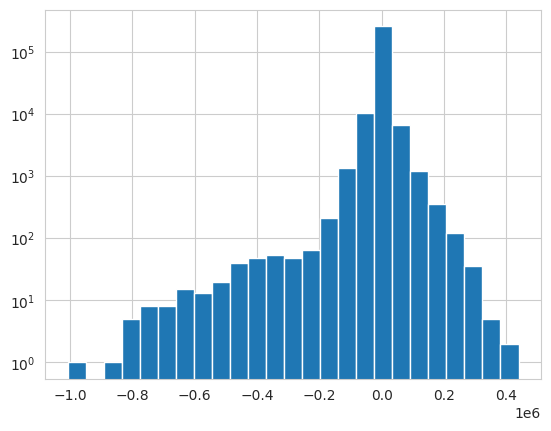

In [37]:
rel_coefficients = pd.read_csv("./results/rel/coefficient_matrix_parallel.tsv", sep='\t', index_col=0)
plt.hist(rel_coefficients.values.ravel(), bins=25, log=True)

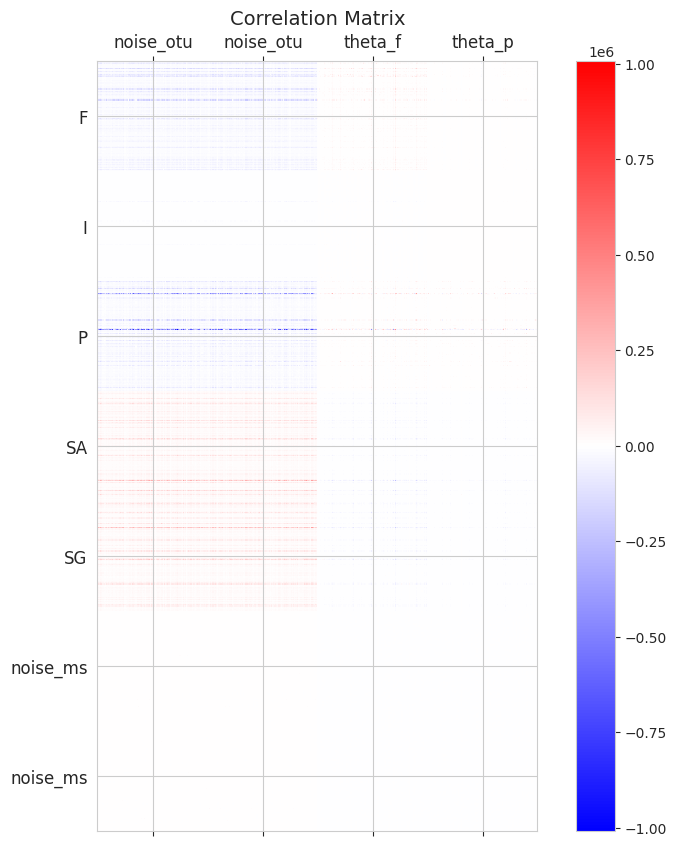

In [38]:
plot_coefficient_matrix(rel_coefficients)

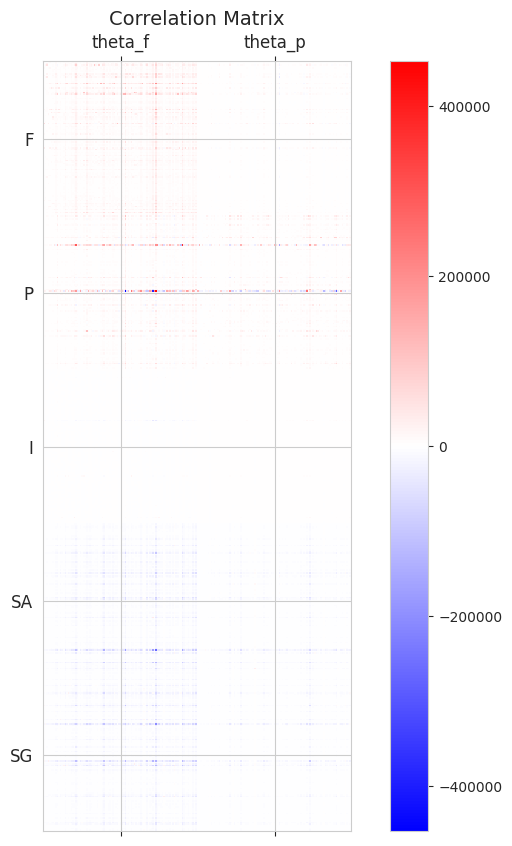

In [43]:
plot_coefficient_matrix((rel_coefficients.loc[metabolites, microbes]))